loading data from kaggle. it moved it to a weird place, so wouldn't recomend doing it again, now that we have it

import kagglehub

# Download latest version
path = kagglehub.dataset_download("aalborguniversity/brackish-dataset")

print("Path to dataset files:", path)

data vis from kaggle


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # For loading the videofile and plotting bounding boxes
import os # For loading datafiles
from matplotlib import pyplot as plt # For plotting the annotations


In [2]:

# Input data files are available in the "../input/" directory.
# Loading data, the data is semicolon seperated.

valid = pd.read_csv("/Users/alteafogh/Documents/ITU/AML/AML-fish-project/data/brackish-dataset/versions/4/annotations/annotations_AAU/valid.csv", sep=";")
train = pd.read_csv("/Users/alteafogh/Documents/ITU/AML/AML-fish-project/data/brackish-dataset/versions/4/annotations/annotations_AAU/train.csv", sep=";")
test = pd.read_csv("/Users/alteafogh/Documents/ITU/AML/AML-fish-project/data/brackish-dataset/versions/4/annotations/annotations_AAU/test.csv", sep=";")

In [3]:
# Specify which video and frame to plot annotations for
video_file = "/Users/alteafogh/Documents/ITU/AML/AML-fish-project/data/brackish-dataset/versions/4/dataset/videos/fish-school/2019-02-21_06-52-16to2019-02-21_06-52-34_1.avi"
frame_num = 52

# Get basename, since the annotation is sorted by the filename
filename = os.path.basename(video_file).replace(".avi","")

In [4]:
valid.columns

Index(['Filename', 'Object ID', 'Annotation tag', 'Upper left corner X',
       'Upper left corner Y', 'Lower right corner X', 'Lower right corner Y'],
      dtype='object')

In [5]:
### Extracting all annotations for the video file using Pandas

# All annotations where the column filename contains the video filename.
annoV = valid[valid["Filename"].str.contains(filename)]
annoT = test[test["Filename"].str.contains(filename)]
annoTr = train[train["Filename"].str.contains(filename)]


In [6]:

# Append annotations from validation, training and test set into one single array named Anno.
anno = annoV
anno = pd.concat([anno,annoT])
anno = pd.concat([anno,annoTr])

In [7]:
### Script for extracting all annotations for the given frame using Pandas

Frame_Anno = anno[anno["Filename"].str.contains("%04d" % frame_num)]  # "%04d" is for making 1 = 0001 to fit annotations.

In [8]:
Frame_Anno

,Filename,Object ID,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
27398,2019-02-21_06-52-16to2019-02-21_06-52-34_1-005...,3,starfish,431,459,475,505


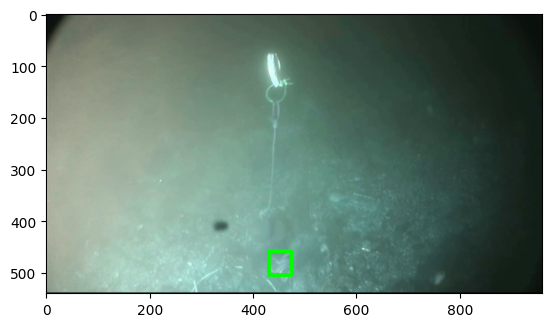

In [10]:

### Script for loading video and drawing bounding boxes
cap = cv2.VideoCapture(video_file)

# Create a empty list, in which all the images from the video will be stored 
Images = []

while(True):
    ret, frame = cap.read()
    if ret == True:
        # Resizing the image to fit the resolution of the annotations (960 x 540) pixels.
        Images.append(cv2.resize(frame, (960, 540)))
    else:
        break



for idx, row in Frame_Anno.iterrows():
    
    # Extracting position of bounding boxes
    UX, UY, LX, LY = row["Upper left corner X"], row["Upper left corner Y"], row["Lower right corner X"], row["Lower right corner Y"]
    cv2.rectangle(Images[frame_num], (UX,UY), (LX, LY), (0, 255, 0), 5) # Drawing bounding boxes

# Plot the annotated image
plt.imshow(Images[frame_num])

In [11]:

### Script for loading video and drawing bounding boxes
cap = cv2.VideoCapture(video_file)



# Create a empty list, in which all the images from the video will be stored 
Images = []

while(True):
    ret, frame = cap.read()

    if ret == True:
        # Resizing the image to fit the resolution of the annotations (960 x 540) pixels.
        Images.append(cv2.resize(frame, (960, 540)))
    else:
        break




In [14]:
anno

,Filename,Object ID,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y
0,2019-02-21_06-52-16to2019-02-21_06-52-34_1-003...,3,starfish,431,459,475,505
229,2019-02-21_06-52-16to2019-02-21_06-52-34_1-022...,3,starfish,431,459,475,505
230,2019-02-21_06-52-16to2019-02-21_06-52-34_1-022...,6,small_fish,696,367,761,399
231,2019-02-21_06-52-16to2019-02-21_06-52-34_1-022...,8,small_fish,621,376,671,419
232,2019-02-21_06-52-16to2019-02-21_06-52-34_1-022...,7,small_fish,512,455,589,540
...,...,...,...,...,...,...,...
28361,2019-02-21_06-52-16to2019-02-21_06-52-34_1-020...,9,small_fish,633,481,712,543
28362,2019-02-21_06-52-16to2019-02-21_06-52-34_1-020...,11,small_fish,700,512,757,540
28363,2019-02-21_06-52-16to2019-02-21_06-52-34_1-020...,10,small_fish,762,491,815,527
28364,2019-02-21_06-52-16to2019-02-21_06-52-34_1-020...,19,small_fish,785,415,852,454


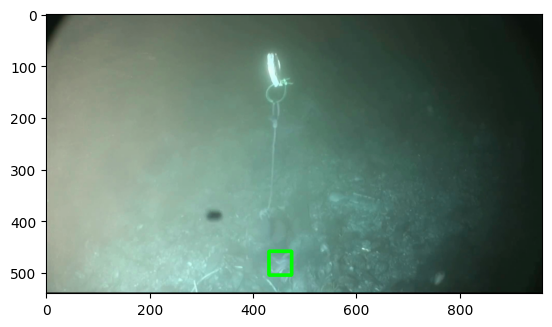

In [ ]:
# there is something weird, which I am understanding but not sure how to fix:
# if I just have cv2.rectangle ... there is an index error, as anno is muuuuuch longer than Images
# but I am not sure how to fix it as Images comes from the video itself, so I am not sure why it is smaller

### Script for annotating all frames in a video.
for idx, row in anno.iterrows():
    # Extracting the frame number for the annotation.
    # Kinda hardcode though, but it works.
    framenum = int(row["Filename"].replace(filename + "-","").replace(".png",""))
    
    
    
    # Again extracting needed information about the bounding box.
    UX, UY, LX, LY = row["Upper left corner X"], row["Upper left corner Y"], row["Lower right corner X"], row["Lower right corner Y"]
    # it only shows one, as I am a master programmer
    try:
        cv2.rectangle(Images[framenum], (UX,UY), (LX, LY), (0, 255, 0), 5) # Drawing bounding boxes
        plt.imshow(Images[framenum])
    except IndexError:
        continue
# Plot the annotated frames, can be inserted into a for loop to show all images.
    